In [1]:
from wordcloud import WordCloud, STOPWORDS
import requests
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
api_url = "https://google-news.p.rapidapi.com/v1/search"
querystring = {"q":"Russia","country":"US","lang":"en","when":"1m"}
headers = {
    'x-rapidapi-host': "google-news.p.rapidapi.com",
    'x-rapidapi-key': "***"
    }
response = requests.request("GET", api_url, headers=headers, params=querystring)
json_resp = response.json()

In [3]:
article_titles = " ".join(article['title'] for article in json_resp['articles'])

In [4]:
stopwrd = STOPWORDS
stopwrd = stopwrd.update(['Daily', 'Mail', 'Financial', 'Times', 'Guardian', 'BBC', 'News', 'POLITICO',
                          'will', 'say', 'says', 'said', 'happened', 'latest', 'evening', 'new', '1m', 'U', 's'])

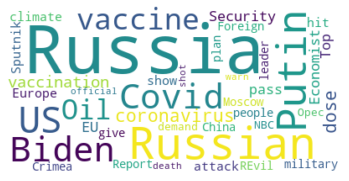

In [5]:
wordcloud = WordCloud(min_font_size=10, max_font_size=80, max_words=50,
                      stopwords=stopwrd, background_color="white").generate(article_titles)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()